In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
adult_df = pd.read_csv(r'adult_data.csv',
                       header = None,delimiter=' *, *')
adult_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
adult_df.shape

(32561, 15)

In [4]:
adult_df.columns = ['age','workclass','fnlwgt','education','education_num',
                    'marital status','occupation','relationship','race',
                    'sex','capital_gain','capital_loss',
                    'hours_per_week','native_country','income']
adult_df.head()

,age,workclass,fnlwgt,education,education_num,marital status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
adult_df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


# Pre processing the data

In [6]:
#Create the copy of the dataframe
adult_df_rev = pd.DataFrame.copy(adult_df)

In [7]:
adult_df_rev = adult_df_rev.drop(["education","fnlwgt"],axis=1)
adult_df_rev.shape

#We r dropping education column as it is a redendent column & fnlwgt column as it is irrevelant column

(32561, 13)

In [8]:
adult_df_rev.dtypes

age                int64
workclass         object
education_num      int64
marital status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [9]:
adult_df_rev.isnull().sum()

age               0
workclass         0
education_num     0
marital status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [10]:
for i in adult_df_rev.columns:
    print({i:adult_df_rev[i].unique()})
    
#To check if there are any special characters in place of values    

{'age': array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87], dtype=int64)}
{'workclass': array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)}
{'education_num': array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8],
      dtype=int64)}
{'marital status': array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)}
{'occupation': array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing'

In [11]:
#replacing the unique values 
adult_df_rev = adult_df_rev.replace('?',np.nan)

In [12]:
adult_df_rev.isnull().sum()

age                  0
workclass         1836
education_num        0
marital status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

In [13]:
#replace the missing values with mode values
for value in ["workclass","occupation","native_country"]:
    adult_df_rev[value].fillna(adult_df_rev[value].mode()[0],
                              inplace=True)

In [14]:
adult_df_rev.workclass.mode()

0    Private
dtype: object

In [15]:
adult_df_rev.isnull().sum()

age               0
workclass         0
education_num     0
marital status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [16]:
"""
for x in adult_df_rev.columns:
    if adult_df_rev[x].dtype=='object' or adult_df_rev[x].dtype=='bool':
        adult_df_rev[x].fillna(adult_df_rev[x].mode()[0],inplace=True)
    elif adult_df_rev[x].dtype=='int64' or adult_df_rev[x].dtype=='float64':
        adult_df_rev[x].fillna(round(adult_df_rev[x].mean()),inplace=True)
"""

"\nfor x in adult_df_rev.columns:\n    if adult_df_rev[x].dtype=='object' or adult_df_rev[x].dtype=='bool':\n        adult_df_rev[x].fillna(adult_df_rev[x].mode()[0],inplace=True)\n    elif adult_df_rev[x].dtype=='int64' or adult_df_rev[x].dtype=='float64':\n        adult_df_rev[x].fillna(round(adult_df_rev[x].mean()),inplace=True)\n"

# Dummy variables using pd.get_dummies()

In [17]:
adult_df_rev_new = pd.get_dummies(adult_df_rev)
adult_df_rev_new.head()

,age,education_num,capital_gain,capital_loss,hours_per_week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia,income_<=50K,income_>50K
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,50,13,0,0,13,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,38,9,0,0,40,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
3,53,7,0,0,40,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
4,28,13,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [18]:
adult_df_rev_new.shape

(32561, 90)

In [19]:
colname=[]
for x in adult_df_rev.columns:
    if adult_df_rev[x].dtypes=='object':
        colname.append(x)
colname        

['workclass',
 'marital status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [20]:
# For preprocessing the data
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for x in colname:
    adult_df_rev[x]=le.fit_transform(adult_df_rev[x])
    
    
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print('Feature', x)
    print('mapping', le_name_mapping)
    
    

Feature workclass
mapping {'Federal-gov': 0, 'Local-gov': 1, 'Never-worked': 2, 'Private': 3, 'Self-emp-inc': 4, 'Self-emp-not-inc': 5, 'State-gov': 6, 'Without-pay': 7}
Feature marital status
mapping {'Divorced': 0, 'Married-AF-spouse': 1, 'Married-civ-spouse': 2, 'Married-spouse-absent': 3, 'Never-married': 4, 'Separated': 5, 'Widowed': 6}
Feature occupation
mapping {'Adm-clerical': 0, 'Armed-Forces': 1, 'Craft-repair': 2, 'Exec-managerial': 3, 'Farming-fishing': 4, 'Handlers-cleaners': 5, 'Machine-op-inspct': 6, 'Other-service': 7, 'Priv-house-serv': 8, 'Prof-specialty': 9, 'Protective-serv': 10, 'Sales': 11, 'Tech-support': 12, 'Transport-moving': 13}
Feature relationship
mapping {'Husband': 0, 'Not-in-family': 1, 'Other-relative': 2, 'Own-child': 3, 'Unmarried': 4, 'Wife': 5}
Feature race
mapping {'Amer-Indian-Eskimo': 0, 'Asian-Pac-Islander': 1, 'Black': 2, 'Other': 3, 'White': 4}
Feature sex
mapping {'Female': 0, 'Male': 1}
Feature native_country
mapping {'Cambodia': 0, 'Canada'

In [21]:
adult_df_rev.head()

#0--> <=50k
#1-->  >50k

,age,workclass,education_num,marital status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,6,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,13,2,3,0,4,1,0,0,13,38,0
2,38,3,9,0,5,1,4,1,0,0,40,38,0
3,53,3,7,2,5,0,2,1,0,0,40,38,0
4,28,3,13,2,9,5,2,0,0,0,40,4,0


In [22]:
X = adult_df_rev.values[:,0:-1]   #0---->-2
Y = adult_df_rev.values[:,-1]

#values is used to convert the dataframe into an array as arrays helps to create the models fast as they are light in weight

In [23]:
X.shape

(32561, 12)

In [24]:
Y.shape

(32561,)

In [25]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

scaler.fit(X)
X = scaler.transform(X)
#X=scaler.fit_transform(X)
#print(X)

In [26]:
print(X)

[[ 0.03067056  2.62429763  1.13473876 ... -0.21665953 -0.03542945
   0.26136999]
 [ 0.83710898  1.72109965  1.13473876 ... -0.21665953 -2.22215312
   0.26136999]
 [-0.04264203 -0.08529633 -0.42005962 ... -0.21665953 -0.03542945
   0.26136999]
 ...
 [ 1.42360965 -0.08529633 -0.42005962 ... -0.21665953 -0.03542945
   0.26136999]
 [-1.21564337 -0.08529633 -0.42005962 ... -0.21665953 -1.65522476
   0.26136999]
 [ 0.98373415  0.81790166 -0.42005962 ... -0.21665953 -0.03542945
   0.26136999]]


In [27]:
Y=Y.astype(int)

# Running a basic model

In [28]:
from sklearn.model_selection import train_test_split  #<1000=in range of 80-20  &  >1000=in range of 70-80

#Split the data into test and train
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=10)

In [1]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

NameError: name 'X_train' is not defined

In [91]:
from sklearn.linear_model import LogisticRegression
#create a model object
classifier = LogisticRegression()

#train the model object
classifier.fit(X_train,Y_train)

Y_pred=classifier.predict(X_test)
print(Y_pred)
print(list(zip(Y_test,Y_pred)))

[0 0 1 ... 0 0 1]
[(0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 1), (1, 0), (0, 0), (1, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (1, 0), (0, 0), (0, 0), (1, 0), (1, 0), (0, 1), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (1, 0), (0, 0), (0, 1), (1, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (1, 1), (1, 0), (0, 0), (1, 0), (1, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0

In [92]:
#print(list(zip(Y_test,Y_pred)))

print(list(zip(adult_df_rev.columns[:-1],classifier.coef_.ravel())))  #ravel is used to flaten the array
print(classifier.intercept_)
#classifier.coef_

[('age', 0.4741411660384544), ('workclass', 0.8621136277136521), ('education_num', -0.3491150670807129), ('marital status', -0.01552418003791696), ('occupation', -0.178771315928283), ('relationship', 0.11053766721709372), ('race', 0.4189094084315502), ('sex', 2.4275697712682063), ('capital_gain', 0.2869996726537055), ('capital_loss', 0.37170699548141906)]
[-1.4953198]


In [93]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

[[7018  405]
 [1318 1028]]
Classification report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7423
           1       0.72      0.44      0.54      2346

    accuracy                           0.82      9769
   macro avg       0.78      0.69      0.72      9769
weighted avg       0.81      0.82      0.81      9769

Accuracy of the model:  0.8236257549390931


# Adjusting the threshold

In [94]:
# store the predicted probabilities
y_pred_prob = classifier.predict_proba(X_test)
print(y_pred_prob)

[[0.95831253 0.04168747]
 [0.97501687 0.02498313]
 [0.24364199 0.75635801]
 ...
 [0.84253325 0.15746675]
 [0.82784054 0.17215946]
 [0.16188528 0.83811472]]


In [95]:
y_pred_class=[]

for value in y_pred_prob[:,1]:
    if value > 0.4:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)
print(y_pred_class)        

[0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 

In [96]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,y_pred_class)
print(cfm)

print("Classification report:")

print(classification_report(Y_test,y_pred_class))

acc=accuracy_score(Y_test,y_pred_class)
print("Accuracy of the model: ",acc)

[[6727  696]
 [1061 1285]]
Classification report:
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      7423
           1       0.65      0.55      0.59      2346

    accuracy                           0.82      9769
   macro avg       0.76      0.73      0.74      9769
weighted avg       0.81      0.82      0.81      9769

Accuracy of the model:  0.8201453577643566


In [97]:
y_pred_class=[]

for value in y_pred_prob[:,1]:
    if value > 0.3:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)
print(y_pred_class)   

[0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 

In [98]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,y_pred_class)
print(cfm)

print("Classification report:")

print(classification_report(Y_test,y_pred_class))

acc=accuracy_score(Y_test,y_pred_class)
print("Accuracy of the model: ",acc)

[[6246 1177]
 [ 767 1579]]
Classification report:
              precision    recall  f1-score   support

           0       0.89      0.84      0.87      7423
           1       0.57      0.67      0.62      2346

    accuracy                           0.80      9769
   macro avg       0.73      0.76      0.74      9769
weighted avg       0.81      0.80      0.81      9769

Accuracy of the model:  0.8010031733033064


In [99]:
for a in np.arange(0.4,0.61,0.01):
    predict_mine = np.where(y_pred_prob[:,1]>a,1,0)
    cfm = confusion_matrix(Y_test,predict_mine)
    total_err = cfm[0,1]+cfm[1,0]
    print("Errors at threshold ", a , ":",total_err,", type 2 error :",
         cfm[1,0],", type 1 error:",cfm[0,1])

Errors at threshold  0.4 : 1757 , type 2 error : 1061 , type 1 error: 696
Errors at threshold  0.41000000000000003 : 1742 , type 2 error : 1084 , type 1 error: 658
Errors at threshold  0.42000000000000004 : 1744 , type 2 error : 1110 , type 1 error: 634
Errors at threshold  0.43000000000000005 : 1749 , type 2 error : 1137 , type 1 error: 612
Errors at threshold  0.44000000000000006 : 1746 , type 2 error : 1164 , type 1 error: 582
Errors at threshold  0.45000000000000007 : 1724 , type 2 error : 1189 , type 1 error: 535
Errors at threshold  0.4600000000000001 : 1718 , type 2 error : 1214 , type 1 error: 504
Errors at threshold  0.4700000000000001 : 1710 , type 2 error : 1234 , type 1 error: 476
Errors at threshold  0.4800000000000001 : 1719 , type 2 error : 1265 , type 1 error: 454
Errors at threshold  0.4900000000000001 : 1712 , type 2 error : 1289 , type 1 error: 423
Errors at threshold  0.5000000000000001 : 1723 , type 2 error : 1318 , type 1 error: 405
Errors at threshold  0.51000000

In [100]:
#Total Error should be reduced
#optimum threshold for the given data

In [101]:
y_pred_class=[]

for value in y_pred_prob[:,1]:
    if value > 0.46:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)
print(y_pred_class)        

[0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 

In [102]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,y_pred_class)
print(cfm)

print("Classification report:")

print(classification_report(Y_test,y_pred_class))

acc=accuracy_score(Y_test,y_pred_class)
print("Accuracy of the model: ",acc)

#So 0.46 is the accurate threshold for the given data as it has reduced the no. of errors in the data 

[[6919  504]
 [1214 1132]]
Classification report:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      7423
           1       0.69      0.48      0.57      2346

    accuracy                           0.82      9769
   macro avg       0.77      0.71      0.73      9769
weighted avg       0.81      0.82      0.81      9769

Accuracy of the model:  0.8241375780530249


In [42]:
from sklearn import metrics

fpr,tpr,z=metrics.roc_curve(Y_test,y_pred_prob[:,1])
auc=metrics.auc(fpr,tpr)

print(auc)

#fpr-false postive rate   tpr-true positive rate

0.8510163280208206


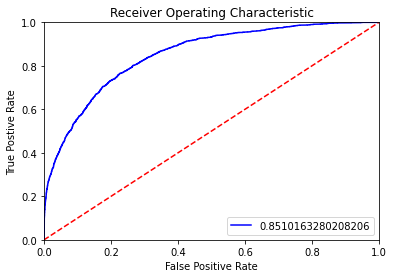

In [43]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr,'b',label=auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Postive Rate')

plt.show()

In [44]:
from sklearn import metrics

fpr,tpr,z=metrics.roc_curve(Y_test,y_pred_class)
auc=metrics.auc(fpr,tpr)

print(auc)
print(fpr)
print(tpr)



0.7079857322331378
[0.         0.06910952 1.        ]
[0.         0.48508099 1.        ]


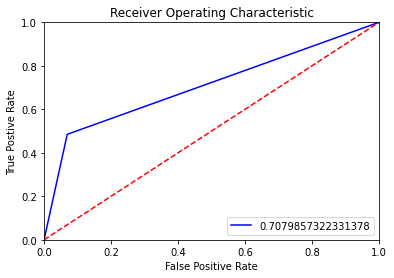

In [45]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr,'b',label=auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Postive Rate')

plt.show()

#for single threshold value we get a elbow point

In [46]:
from sklearn.linear_model import SGDClassifier

classifier = SGDClassifier(loss="log",
                 learning_rate="constant",
                 eta0=0.00001, #alpha
                 shuffle=True,
                 #while going ahead with the next epoch shuffle the obs
                 random_state=10, #set seed
                 max_iter=1000, #max. no of obs
                 early_stopping=True,
                 #stop if zero convergence is reached first
                 n_iter_no_change=5)
      #no. of obs to wait for the before concluding early stopping
    
classifier.fit(X_train,Y_train) 

Y_pred=classifier.predict(X_test)

#print intercepts and coefficients
#print(classifier.intercept_)
#print(classifier.coef_)

In [47]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

[[6632  791]
 [1052 1294]]
Classification report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.88      7423
           1       0.62      0.55      0.58      2346

    accuracy                           0.81      9769
   macro avg       0.74      0.72      0.73      9769
weighted avg       0.80      0.81      0.81      9769

Accuracy of the model:  0.8113420002047292


In [48]:
classifier.n_iter_

6

In [49]:
classifier.t_

136753.0

In [50]:
colname=adult_df_rev.columns

In [103]:
from sklearn.feature_selection import RFE
rfe=RFE(classifier, 8)
model_rfe=rfe.fit(X_train,Y_train)
print("Num Features : ",model_rfe.n_features_)
print("Selected Features: ")
print(list(zip(colname,model_rfe.support_)))
print("Feature Ranking: ",model_rfe.ranking_)

Num Features :  8
Selected Features: 
[('age', True), ('workclass', True), ('education_num', True), ('marital status', False), ('occupation', True), ('relationship', False), ('race', True), ('sex', True), ('capital_gain', True), ('capital_loss', True)]
Feature Ranking:  [1 1 1 3 1 2 1 1 1 1]


In [104]:
Y_pred=model_rfe.predict(X_test)

In [105]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

[[7011  412]
 [1323 1023]]
Classification report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7423
           1       0.71      0.44      0.54      2346

    accuracy                           0.82      9769
   macro avg       0.78      0.69      0.72      9769
weighted avg       0.81      0.82      0.81      9769

Accuracy of the model:  0.8223973794656567


In [123]:
"""

"""

'\n\n'

In [139]:
X = adult_df_rev.values[:,:-1]
Y = adult_df_rev.values[:,-1]

In [125]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
 
 
test = SelectKBest(score_func=chi2, k=10)
fit1 = test.fit(X, Y)
 
print(fit1.scores_)
print(list(zip(colname,fit1.get_support())))
X = fit1.transform(X)

[8.60061182e+03 9.35436386e-02 2.40142178e+03 1.12346982e+03
 1.00356439e+02 3.65914312e+03 3.30313051e+01 5.02439419e+02
 8.21924671e+07 1.37214589e+06 6.47640900e+03 1.74341889e+01]
[('age', True), ('workclass', False), ('education_num', True), ('marital status', True), ('occupation', True), ('relationship', True), ('race', True), ('sex', True), ('capital_gain', True), ('capital_loss', True), ('hours_per_week', True), ('native_country', False)]


In [140]:
from sklearn.preprocessing import StandardScaler
 
scaler = StandardScaler()
 
scaler.fit(X)
 
X = scaler.transform(X)

In [141]:

from sklearn.model_selection import train_test_split
 
#Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=10) 

In [128]:
from sklearn.linear_model import LogisticRegression
#create a model
classifier=(LogisticRegression())
#fitting training data to the model
classifier.fit(X_train,Y_train)
Y_pred=classifier.predict(X_test)
#print(list(zip(Y_test,Y_pred)))

In [129]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
 
confusion_matrix=confusion_matrix(Y_test,Y_pred)
print(confusion_matrix)
print()
 
 
print("Classification report: ")
 
print(classification_report(Y_test,Y_pred))
 
accuracy_score=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",accuracy_score)

[[7018  405]
 [1318 1028]]

Classification report: 
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7423
           1       0.72      0.44      0.54      2346

    accuracy                           0.82      9769
   macro avg       0.78      0.69      0.72      9769
weighted avg       0.81      0.82      0.81      9769

Accuracy of the model:  0.8236257549390931


In [130]:
from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold(0.9)
fit1 = vt.fit(X,Y)
print(fit1.variances_)

features = fit1.transform(X)
print(features.shape[1])
print(list(zip(colname,fit1.get_support())))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
10
[('age', True), ('workclass', True), ('education_num', True), ('marital status', True), ('occupation', True), ('relationship', True), ('race', True), ('sex', True), ('capital_gain', True), ('capital_loss', True)]


In [147]:
X = adult_df_rev.values[:,:-1]
Y = adult_df_rev.values[:,-1]

In [148]:
from sklearn.preprocessing import StandardScaler
 
scaler = StandardScaler()
 
scaler.fit(X)
 
X = scaler.transform(X)

In [149]:
from sklearn.model_selection import train_test_split
 
#Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=10) 

In [150]:
X.shape

(32561, 12)

In [151]:
#Using cross validation

classifier=LogisticRegression()

#performing kfold_cross_validation
from sklearn.model_selection import KFold
kfold_cv=KFold(n_splits=10,random_state=10,shuffle=True)
#print(kfold_cv)

from sklearn.model_selection import cross_val_score
#running the model using scoring metric as accuracy
kfold_cv_result=cross_val_score(estimator=classifier,X=X_train,
                                                 y=Y_train, cv=kfold_cv)
print(kfold_cv_result)
#finding the mean
print(kfold_cv_result.mean())

#for the sake of evaluation the model is it durable or not

[0.83333333 0.8254386  0.82799473 0.82755595 0.82492321 0.81965774
 0.825362   0.82755595 0.81483107 0.81088197]
0.8237534545006658


In [152]:
#model tuning(if we want to tune the model basel on cv model we use this)----Its an additive model n therfore its kind of heavier
#So this will lag more

for train_value, test_value in kfold_cv.split(X_train):
    classifier.fit(X_train[train_value], Y_train[train_value]).predict(X_train[test_value])
    
    
    

In [153]:
Y_pred=classifier.predict(X_test)
#print(list(zip(Y_test,Y_pred)))

In [154]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
 
confusion_matrix=confusion_matrix(Y_test,Y_pred)
print(confusion_matrix)
print()
 
 
print("Classification report: ")
 
print(classification_report(Y_test,Y_pred))
 
accuracy_score=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",accuracy_score)

[[7013  410]
 [1315 1031]]

Classification report: 
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7423
           1       0.72      0.44      0.54      2346

    accuracy                           0.82      9769
   macro avg       0.78      0.69      0.72      9769
weighted avg       0.81      0.82      0.81      9769

Accuracy of the model:  0.8234210256935203


In [155]:
X_train.shape

(22792, 12)